<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/plot_subsurface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Plot subsurface variables

In [51]:
# # skip this if package has already been installed
# !pip install modvis

In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import modvis.ats_xdmf as xdmf
import modvis.plot_vis_file as pv
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s: %(message)s')

work_dir = f"../../model2/"
run_dir = "3-transient"
model_dir = os.path.join(work_dir, run_dir)
logging.info(f"Loading data from {model_dir}")
# model_dir = "../data/coalcreek"

2025-04-25 15:42:57,329 - root - INFO: Loading data from ../../model2/3-transient


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# import numpy as np
import modvis.ats_xdmf as xdmf
import modvis.plot_vis_file as pv

# model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [36]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

# import vis data

In [37]:
visfile = xdmf.VisFile(model_dir, domain=None, load_mesh=True, columnar=True, 
                      model_time_unit= 'd')

In [38]:
# all available variable names
list(visfile.d.keys())

['base_porosity',
 'capillary_pressure_gas_liq',
 'cell_volume',
 'darcy_velocity.0',
 'darcy_velocity.1',
 'darcy_velocity.2',
 'mass_density_liquid',
 'molar_density_liquid',
 'permeability',
 'plant_wilting_factor',
 'porosity',
 'pressure',
 'relative_permeability',
 'root_fraction',
 'saturation_gas',
 'saturation_liquid',
 'transpiration',
 'viscosity_liquid',
 'water_content',
 'water_source']

# plot subsurface satuation

## single column

This will print a variable across a single column over the entire simulation period. The user needs to provide cell ids associated with the column. 

The cell ID can be found using ParaView with the following steps:
1. Load data into Paraview. Click `apply`
2. Click on `SplitView` icon and choose `SpreadSheetView`
3. Under `SpreadSheetView`, change Attribute to `Cell Data`; Toggle on `Show only selected elements` (next to the Precision)
4. Under `RenderView`, turn on `Interactively select cells on`
5. Select cells of interests and the spreadsheet will be auto populated the cell attributes with the first column being `Cell ID`
6. Provide the `Cell ID` in `pv.plot_column_data()`.


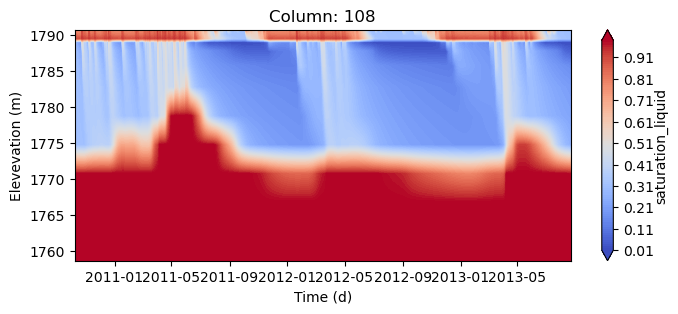

In [39]:
fig, ax = pv.plot_column_data(visfile, var_name = "saturation_liquid", cmap = "coolwarm", 
                              cell_id = 1305, infer_col_from_cell=True)

## single layer

In [40]:
time_slice = '2013-04-15'

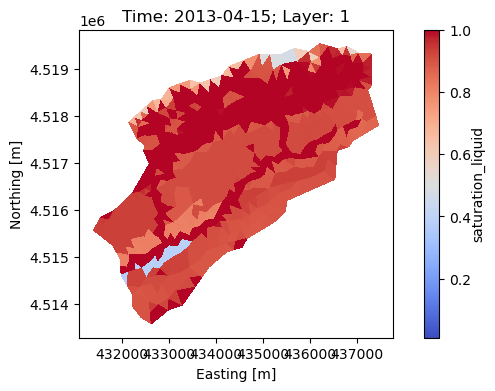

In [41]:
fig, ax = pv.plot_layer_data(visfile, var_name = "saturation_liquid", 
                             layer_ind = 0, time_slice= time_slice,
                          cmap = "coolwarm")

# plot groundwater table

## single column

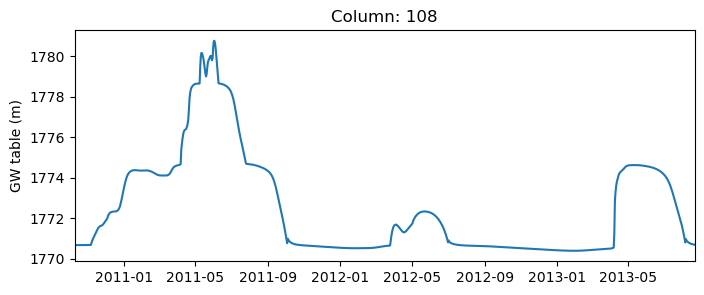

In [42]:
ihead = pv.plot_column_head(visfile, cell_id = 1305, infer_col_from_cell=True)

## GW surface

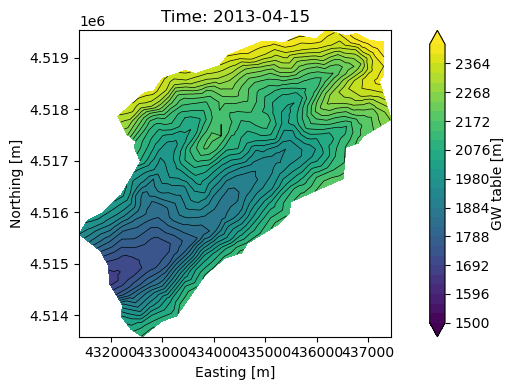

In [43]:
fig, ax, tpc = pv.plot_gw_surface(visfile, contour = True, 
                                  contourline = True, nlevel = np.arange(1500,2450, 32), 
                                  colorbar = True,
                                  time_slice = time_slice, 
                                 )

# Volumetric water content

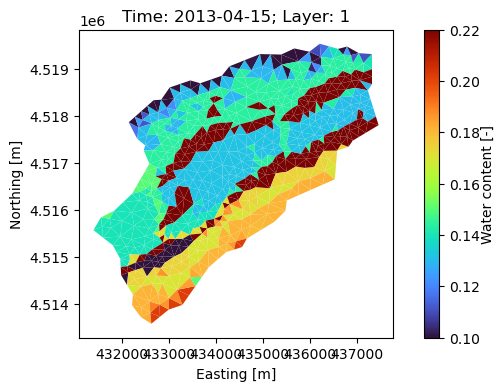

In [44]:
fig, ax, tpc = pv.plot_water_content(visfile, layer_ind = 0, 
                                     vmin = 0.1, vmax = 0.22, cmap = 'turbo',
                                     time_slice=time_slice)